In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import tensorflow

# Read the CSV and Perform Basic Data Cleaning

In [8]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [9]:
# Drop unnecesary columns for the model 
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [10]:
# drop the error columns 
df = df.drop(['koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2',
              'koi_impact_err1', 'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2',
              'koi_depth_err1', 'koi_depth_err2', 'koi_prad_err1', 'koi_prad_err2', 
              'koi_insol_err1', 'koi_insol_err2', 'koi_steff_err1', 'koi_steff_err2', 
              'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'], axis=1)

### Feature Definitions
#### <b>source:</b> <a href="https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html">NASA Exoplanet Archive</a>  
 
<strong>koi_fpflag_nt</strong>  
A KOI whose light curve is not consistent with that of a transiting planet. This includes, but is not limited to, instrumental artifacts, non-eclipsing variable stars, and spurious (very low SNR) detections  
<strong>koi_fpflag_ss</strong>  
A KOI that is observed to have a significant secondary event, transit shape, or out-of-eclipse variability, which indicates that the transit-like event is most likely caused by an eclipsing binary. However, self-luminous, hot Jupiters with a visible secondary eclipse will also have this flag set, but with a disposition of PC.  
<strong>koi_fpflag_co</strong>  
The source of the signal is from a nearby star, as inferred by measuring the centroid location of the image both in and out of transit, or by the strength of the transit signal in the target's outer (halo) pixels as compared to the transit signal from the pixels in the optimal (or core) aperture.  
<strong>koi_fpflag_ec</strong>    
The KOI shares the same period and epoch as another object and is judged to be the result of flux contamination in the aperture or electronic crosstalk.    
<strong>koi_period</strong>    
The interval between consecutive planetary transits.  
<strong>koi_period_err1</strong>  
Level of uncertainty for above  
<strong>koi_period_err2</strong>   
Level of uncertainty for above  
<strong>koi_time0bk</strong>  
The time corresponding to the center of the first detected transit in Barycentric Julian Day (BJD) minus a constant offset of 2,454,833.0 days. The offset corresponds to 12:00 on Jan 1, 2009 UTC.  
<strong>koi_time0bk_err1</strong>  
Level of uncertainty for above  
<strong>koi_time0bk_err2</strong>  
Level of uncertainty for above  
<strong>koi_impact</strong>  
The sky-projected distance between the center of the stellar disc and the center of the planet disc at conjunction, normalized by the stellar radius.  
<strong>koi_impact_err1</strong>  
Level of uncertainty for above  
<strong>koi_impact_err2</strong>  
Level of uncertainty for above  
<strong>koi_duration</strong>  
The duration of the observed transits. Duration is measured from first contact between the planet and star until last contact. Contact times are typically computed from a best-fit model produced by a Mandel-Agol (2002) model fit to a multi-quarter Kepler light curve, assuming a linear orbital ephemeris.  
<strong>koi_duration_err1</strong>  
Level of uncertainty for above  
<strong>koi_duration_err2</strong>  
Level of uncertainty for above  
<strong>koi_depth</strong>  
The fraction of stellar flux lost at the minimum of the planetary transit. Transit depths are typically computed from a best-fit model produced by a Mandel-Agol (2002) model fit to a multi-quarter Kepler light curve, assuming a linear orbital ephemeris.  
<strong>koi_depth_err1</strong>  
Level of uncertainty for above  
<strong>koi_depth_err2</strong>  
Level of uncertainty for above  
<strong>koi_prad</strong>  
The radius of the planet. Planetary radius is the product of the planet star radius ratio and the stellar radius.  
<strong>koi_prad_err1</strong>  
Level of uncertainty for above  
<strong>koi_prad_err2</strong>  
Level of uncertainty for above  
<strong>koi_teq</strong>  
Approximation for the temperature of the planet. The calculation of equilibrium temperature assumes a) thermodynamic equilibrium between the incident stellar flux and the radiated heat from the planet, b) a Bond albedo (the fraction of total power incident upon the planet scattered back into space) of 0.3, c) the planet and star are blackbodies, and d) the heat is evenly distributed between the day and night sides of the planet.  
<strong>koi_insol</strong>  
Insolation flux is another way to give the equilibrium temperature. It depends on the stellar parameters (specifically the stellar radius and temperature), and on the semi-major axis of the planet. It's given in units relative to those measured for the Earth from the Sun.  
<strong>koi_insol_err1</strong>  
Level of uncertainty for above  
<strong>koi_insol_err2</strong>  
Level of uncertainty for above  
<strong>koi_model_snr</strong>  
Transit depth normalized by the mean uncertainty in the flux during the transits.  
<strong>koi_tce_plnt_num</strong>  
TCE Planet Number federated to the KOI.  
<strong>koi_steff</strong>  
The photospheric temperature of the star.  
<strong>koi_steff_err1</strong>  
Level of uncertainty for above  
<strong>koi_steff_err2</strong>  
Level of uncertainty for above  
<strong>koi_slogg</strong>  
The base-10 logarithm of the acceleration due to gravity at the surface of the star.  
<strong>koi_slogg_err1</strong>  
Level of uncertainty for above  
<strong>koi_slogg_err2</strong>  
Level of uncertainty for above  
<strong>koi_srad</strong>  
The photospheric radius of the star  
<strong>koi_srad_err1</strong>  
Level of uncertainty for above  
<strong>koi_srad_err2</strong>  
Level of uncertainty for above  
<strong>ra</strong>  
KIC Right Ascension  
<strong>dec</strong>  
KIC Declination  
<strong>koi_kepmag</strong>    
Kepler-band (mag)  


# Feature Selection

In [11]:
# Set features
# Select just those related to planet features (exlcude those related to star features)

feature_names = ['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
                 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol',
                 'koi_model_snr', 'koi_tce_plnt_num']

X = df[feature_names]

# Target Selection

In [12]:
target_names = df['koi_disposition'].unique()[0:3]
target_names

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [13]:
y  = df["koi_disposition"]

# Create a Train Test Split


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num
6122,0,0,0,0,6.768901,133.077240,0.150,3.61600,123.1,1.24,1017,253.30,10.8,1
6370,0,1,0,1,0.733726,132.020050,0.291,2.30900,114.6,0.86,1867,2891.64,13.8,1
2879,1,0,0,0,7.652707,134.460380,0.970,79.89690,641.1,3.21,989,226.81,254.3,1
107,0,0,0,0,7.953547,174.662240,0.300,2.63120,875.4,2.25,696,55.37,38.4,1
29,0,0,0,0,4.959319,172.258529,0.831,2.22739,9802.0,12.21,1103,349.40,696.5,1


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [16]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

# Create the scaler
X_scaler = MinMaxScaler().fit(X_train)

# Transform the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [17]:
# Convert the y values to numerical using label_encoder/to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)


# Train the Model



In [152]:
# Create the model and add layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

inputs = X_train.shape[1]

model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=inputs))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))


In [153]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [154]:
 model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               1500      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 303       
Total params: 11,903
Trainable params: 11,903
Non-trainable params: 0
_________________________________________________________________


In [155]:
 model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=200,
    shuffle=True,
    verbose=2,
)

Epoch 1/200
164/164 - 2s - loss: 0.5309 - accuracy: 0.7170
Epoch 2/200
164/164 - 0s - loss: 0.3737 - accuracy: 0.7917
Epoch 3/200
164/164 - 0s - loss: 0.3678 - accuracy: 0.7936
Epoch 4/200
164/164 - 0s - loss: 0.3620 - accuracy: 0.7994
Epoch 5/200
164/164 - 0s - loss: 0.3566 - accuracy: 0.8074
Epoch 6/200
164/164 - 0s - loss: 0.3553 - accuracy: 0.8138
Epoch 7/200
164/164 - 0s - loss: 0.3528 - accuracy: 0.8144
Epoch 8/200
164/164 - 0s - loss: 0.3497 - accuracy: 0.8135
Epoch 9/200
164/164 - 0s - loss: 0.3461 - accuracy: 0.8175
Epoch 10/200
164/164 - 0s - loss: 0.3452 - accuracy: 0.8188
Epoch 11/200
164/164 - 0s - loss: 0.3456 - accuracy: 0.8198
Epoch 12/200
164/164 - 0s - loss: 0.3405 - accuracy: 0.8266
Epoch 13/200
164/164 - 0s - loss: 0.3391 - accuracy: 0.8236
Epoch 14/200
164/164 - 0s - loss: 0.3366 - accuracy: 0.8283
Epoch 15/200
164/164 - 0s - loss: 0.3344 - accuracy: 0.8280
Epoch 16/200
164/164 - 0s - loss: 0.3324 - accuracy: 0.8306
Epoch 17/200
164/164 - 0s - loss: 0.3323 - accura

164/164 - 0s - loss: 0.2226 - accuracy: 0.9029
Epoch 138/200
164/164 - 0s - loss: 0.2225 - accuracy: 0.9023
Epoch 139/200
164/164 - 0s - loss: 0.2212 - accuracy: 0.9016
Epoch 140/200
164/164 - 0s - loss: 0.2210 - accuracy: 0.9048
Epoch 141/200
164/164 - 0s - loss: 0.2243 - accuracy: 0.9006
Epoch 142/200
164/164 - 0s - loss: 0.2226 - accuracy: 0.9014
Epoch 143/200
164/164 - 0s - loss: 0.2244 - accuracy: 0.9041
Epoch 144/200
164/164 - 0s - loss: 0.2173 - accuracy: 0.9050
Epoch 145/200
164/164 - 0s - loss: 0.2232 - accuracy: 0.9037
Epoch 146/200
164/164 - 0s - loss: 0.2199 - accuracy: 0.9052
Epoch 147/200
164/164 - 0s - loss: 0.2211 - accuracy: 0.8978
Epoch 148/200
164/164 - 0s - loss: 0.2227 - accuracy: 0.9020
Epoch 149/200
164/164 - 0s - loss: 0.2237 - accuracy: 0.9010
Epoch 150/200
164/164 - 0s - loss: 0.2231 - accuracy: 0.9022
Epoch 151/200
164/164 - 0s - loss: 0.2190 - accuracy: 0.9050
Epoch 152/200
164/164 - 0s - loss: 0.2167 - accuracy: 0.9073
Epoch 153/200
164/164 - 0s - loss: 0.2

# Quantify Model


In [156]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

55/55 - 0s - loss: 0.3299 - accuracy: 0.8953
Normal Neural Network - Loss: 0.32988908886909485, Accuracy: 0.8953089118003845


In [157]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = np.argmax(model.predict(X_test_scaled), axis=-1)
print(classification_report(encoded_y_test, predictions,
                            target_names=target_names))

                precision    recall  f1-score   support

     CONFIRMED       0.81      0.77      0.79       411
FALSE POSITIVE       0.81      0.84      0.82       484
     CANDIDATE       0.98      0.99      0.99       853

      accuracy                           0.90      1748
     macro avg       0.87      0.87      0.87      1748
  weighted avg       0.89      0.90      0.89      1748



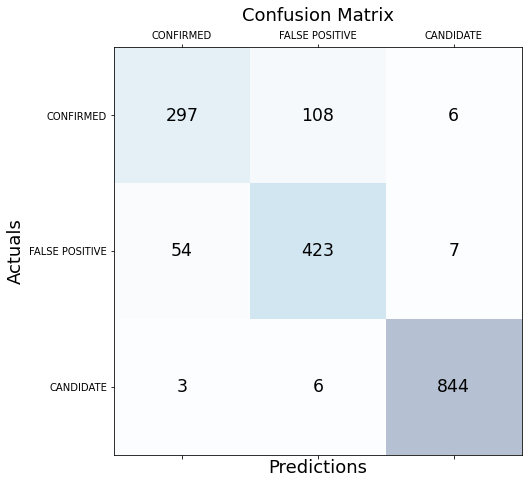

In [99]:
# Create a confusion matrix to visualise the performance 
from sklearn.metrics import confusion_matrix

predictions = np.argmax(model.predict(X_test_scaled), axis=-1)

conf_matrix = confusion_matrix(y_true=encoded_y_test, y_pred=predictions)

fig, ax = plt.subplots(figsize=(7.5, 7.5))

ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predictions', fontsize=18)
ax.set_xticks([0,1,2])
ax.set_xticklabels(target_names)
plt.ylabel('Actuals', fontsize=18)
ax.set_yticks([0,1,2])
ax.set_yticklabels(target_names)

plt.show()

# Hyperparameter Tuning


In [173]:
import keras_tuner as kt

def build_model(hp):
    model = tensorflow.keras.Sequential()

    # Tune the number of units in the layers
    hp_units1 = hp.Int('units1', min_value=50, max_value=400, step=50)
    hp_units2 = hp.Int('units2', min_value=50, max_value=400, step=50)
        
    # Add the layers      
    model.add(Dense(units=100, activation='relu', input_dim=inputs))
    model.add(Dense(units=100, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[0.001, 0.01, 0.1, 0.2, 0.3])

    model.compile(
      optimizer = tensorflow.keras.optimizers.Adam(learning_rate=hp_learning_rate),
      loss = 'categorical_crossentropy',
      metrics = ['accuracy']
    )

    return model

# HyperBand algorithm from keras_tuner
tuner = kt.Hyperband(
        build_model,
        objective='val_accuracy',
        max_epochs=1000,
        directory='hp_dir',
        project_name='neural_net_tuning'
        )

# Perform the hyperperameter tuning 
tuner.search(X_train_scaled, y_train_categorical, epochs=200, validation_split=0.2)

Trial 235 Complete [00h 00m 03s]
val_accuracy: 0.7797902822494507

Best val_accuracy So Far: 0.8446139097213745
Total elapsed time: 00h 12m 35s
INFO:tensorflow:Oracle triggered exit


In [174]:
# Extract the best model and evaluate with the test data
# Print accuracy and loss with test data
best_model = tuner.get_best_models(num_models=1)[0]
loss, accuracy = best_model.evaluate(X_test_scaled, y_test_categorical)

55/55 [==============================] - 0s 554us/step - loss: 0.3714 - accuracy: 0.8181


In [175]:
# Print optimal hyperparamaters
for h_param in [f"units{i}" for i in range(1,3)] + ['learning_rate']:
    print(h_param, tuner.get_best_hyperparameters()[0].get(h_param))

units1 350
units2 200
learning_rate 0.01


In [176]:
# Create the adjusted model
inputs = X_train.shape[1]

model = Sequential()
model.add(Dense(units=350, activation='relu', input_dim=inputs))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

# Compile the adjusted model
model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )

In [177]:
# Fit the adjusted model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=200,
    shuffle=True,
    verbose=2,
)

Epoch 1/200
164/164 - 0s - loss: 0.4116 - accuracy: 0.7622
Epoch 2/200
164/164 - 0s - loss: 0.3815 - accuracy: 0.7812
Epoch 3/200
164/164 - 0s - loss: 0.3682 - accuracy: 0.8001
Epoch 4/200
164/164 - 0s - loss: 0.3582 - accuracy: 0.8180
Epoch 5/200
164/164 - 0s - loss: 0.3603 - accuracy: 0.8129
Epoch 6/200
164/164 - 0s - loss: 0.3551 - accuracy: 0.8177
Epoch 7/200
164/164 - 0s - loss: 0.3482 - accuracy: 0.8255
Epoch 8/200
164/164 - 0s - loss: 0.3429 - accuracy: 0.8247
Epoch 9/200
164/164 - 0s - loss: 0.3337 - accuracy: 0.8341
Epoch 10/200
164/164 - 0s - loss: 0.3250 - accuracy: 0.8436
Epoch 11/200
164/164 - 0s - loss: 0.3342 - accuracy: 0.8348
Epoch 12/200
164/164 - 0s - loss: 0.3220 - accuracy: 0.8432
Epoch 13/200
164/164 - 0s - loss: 0.3173 - accuracy: 0.8468
Epoch 14/200
164/164 - 0s - loss: 0.3148 - accuracy: 0.8489
Epoch 15/200
164/164 - 0s - loss: 0.3043 - accuracy: 0.8615
Epoch 16/200
164/164 - 0s - loss: 0.2934 - accuracy: 0.8688
Epoch 17/200
164/164 - 0s - loss: 0.2873 - accura

164/164 - 0s - loss: 0.2243 - accuracy: 0.9014
Epoch 138/200
164/164 - 0s - loss: 0.2211 - accuracy: 0.9008
Epoch 139/200
164/164 - 0s - loss: 0.2252 - accuracy: 0.9023
Epoch 140/200
164/164 - 0s - loss: 0.2238 - accuracy: 0.9060
Epoch 141/200
164/164 - 0s - loss: 0.2264 - accuracy: 0.8999
Epoch 142/200
164/164 - 0s - loss: 0.2336 - accuracy: 0.8940
Epoch 143/200
164/164 - 0s - loss: 0.2319 - accuracy: 0.8978
Epoch 144/200
164/164 - 0s - loss: 0.2206 - accuracy: 0.9037
Epoch 145/200
164/164 - 0s - loss: 0.2232 - accuracy: 0.9033
Epoch 146/200
164/164 - 0s - loss: 0.2264 - accuracy: 0.8989
Epoch 147/200
164/164 - 0s - loss: 0.2266 - accuracy: 0.9012
Epoch 148/200
164/164 - 0s - loss: 0.2254 - accuracy: 0.9008
Epoch 149/200
164/164 - 0s - loss: 0.2186 - accuracy: 0.9054
Epoch 150/200
164/164 - 0s - loss: 0.2185 - accuracy: 0.9069
Epoch 151/200
164/164 - 0s - loss: 0.2185 - accuracy: 0.9025
Epoch 152/200
164/164 - 0s - loss: 0.2189 - accuracy: 0.9037
Epoch 153/200
164/164 - 0s - loss: 0.2

In [178]:
# Qunatify the adjusted model
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

55/55 - 0s - loss: 0.3897 - accuracy: 0.8987
Normal Neural Network - Loss: 0.3897194266319275, Accuracy: 0.8987414240837097


In [179]:
# Calculate classification report
predictions = np.argmax(model.predict(X_test_scaled), axis=-1)
print(classification_report(encoded_y_test, predictions,
                            target_names=target_names))

                precision    recall  f1-score   support

     CONFIRMED       0.82      0.78      0.80       411
FALSE POSITIVE       0.82      0.83      0.83       484
     CANDIDATE       0.98      0.99      0.99       853

      accuracy                           0.90      1748
     macro avg       0.87      0.87      0.87      1748
  weighted avg       0.90      0.90      0.90      1748



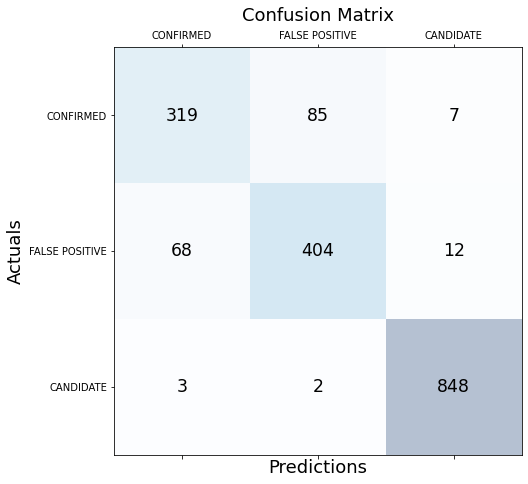

In [180]:
# Create a confusion matrix to visualise the performance of the adjusted model
predictions = np.argmax(model.predict(X_test_scaled), axis=-1)

conf_matrix = confusion_matrix(y_true=encoded_y_test, y_pred=predictions)

fig, ax = plt.subplots(figsize=(7.5, 7.5))

ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predictions', fontsize=18)
ax.set_xticks([0,1,2])
ax.set_xticklabels(target_names)
plt.ylabel('Actuals', fontsize=18)
ax.set_yticks([0,1,2])
ax.set_yticklabels(target_names)

plt.show()

# Save the Model

In [181]:
# Save the model
filename = 'Model 2 - Deep_learning.h5'
model.save(filename)